<a href="https://colab.research.google.com/github/fargonemaciel/infnet-machine-learning-codes/blob/main/feature_engineering_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install ucimlrepo

In [47]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import json

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

In [2]:
path = kagglehub.dataset_download("yelp-dataset/yelp-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'yelp-dataset' dataset.
Path to dataset files: /kaggle/input/yelp-dataset


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
biz_file = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Arquives/yelp_academic_dataset_business.json", lines=True)

biz_file.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [5]:
biz_file.shape

(150346, 14)

In [6]:
biz_file['review_count'].value_counts().sort_values()

,count
review_count,
873,1
2679,1
1195,1
1886,1
1520,1
...,...
9,6875
8,8040
7,9594


In [7]:
biz_file.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

Text(0, 0.5, 'Ocurrence')

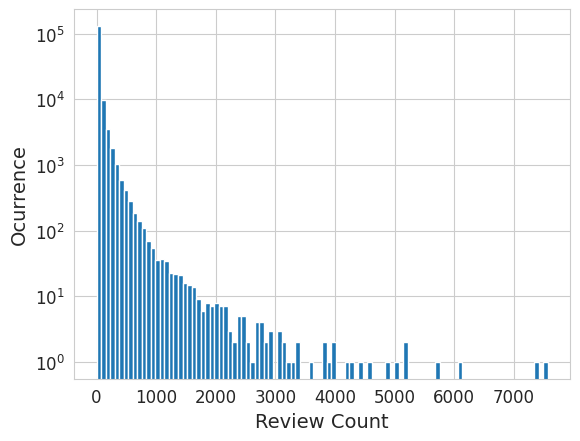

In [8]:
#Histogram from Review Counts

sns.set_style("whitegrid")
fig, ax = plt.subplots()
biz_file['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=12)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Ocurrence', fontsize=14)

In [9]:
deciles = biz_file['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

,review_count
0.1,6.0
0.2,7.0
0.3,9.0
0.4,11.0
0.5,15.0
0.6,20.0
0.7,30.0
0.8,48.0
0.9,97.0


Text(0, 0.5, 'Ocurrence')

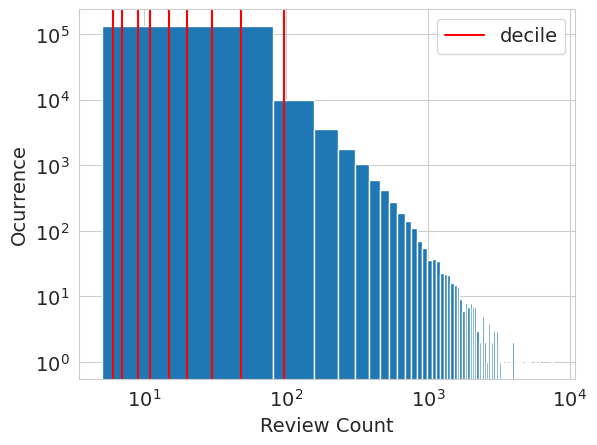

In [10]:
fig, ax = plt.subplots()
biz_file['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
  handle = plt.axvline(pos, color='r')
ax.legend([handle], ['decile'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Ocurrence', fontsize=14)

In [11]:
biz_file['log_review_count'] = np.log10(biz_file['review_count'])

Text(0, 0.5, 'Occurrence')

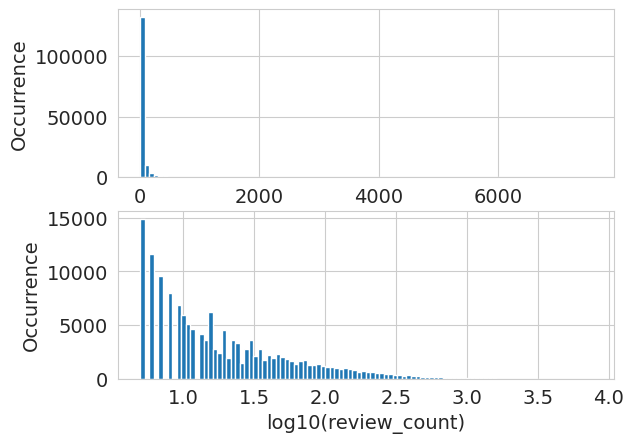

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1)
biz_file['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14)
ax1.set_ylabel('Occurrence', fontsize=14)

biz_file['log_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count)', fontsize=14)
ax2.set_ylabel('Occurrence', fontsize=14)

In [17]:
# fetch dataset
online_news_popularity = fetch_ucirepo(id=332)

# data (as pandas dataframes)
X = online_news_popularity.data.features
y = online_news_popularity.data.targets

# metadata
print(online_news_popularity.metadata)

# variable information
print(online_news_popularity.variables)

{'uci_id': 332, 'name': 'Online News Popularity', 'repository_url': 'https://archive.ics.uci.edu/dataset/332/online+news+popularity', 'data_url': 'https://archive.ics.uci.edu/static/public/332/data.csv', 'abstract': 'This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 39797, 'num_features': 58, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': [' shares'], 'index_col': ['url'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Thu Feb 15 2024', 'dataset_doi': '10.24432/C5NS3V', 'creators': ['Kelwin Fernandes', 'Pedro Vinagre', 'Paulo Cortez', 'Pedro Sernadela'], 'intro_paper': {'ID': 390, 'type': 'NATIVE', 'title': 'A Proactive Intelligent Decisio

In [19]:
X.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [20]:
y.head()

,shares
0,593
1,711
2,1500
3,1200
4,505


In [23]:
type(online_news_popularity)

ucimlrepo.dotdict.dotdict

In [21]:
df = pd.concat(
    [
        online_news_popularity.data.features,
        online_news_popularity.data.targets
    ],
    axis=1
)

df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [29]:
print(df.columns.tolist())

[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', ' rate_negative_words'

In [30]:
df.columns = df.columns.str.strip()

In [39]:
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

In [36]:
print(df.columns.tolist())

['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarit

In [42]:
df[['n_tokens_content', 'log_n_tokens_content']]

,n_tokens_content,log_n_tokens_content
0,219.0,2.342423
1,255.0,2.408240
2,211.0,2.326336
3,531.0,2.725912
4,1072.0,3.030600
...,...,...
39639,346.0,2.540329
39640,328.0,2.517196
39641,442.0,2.646404
39642,682.0,2.834421


Text(0, 0.5, 'Number of Articles')

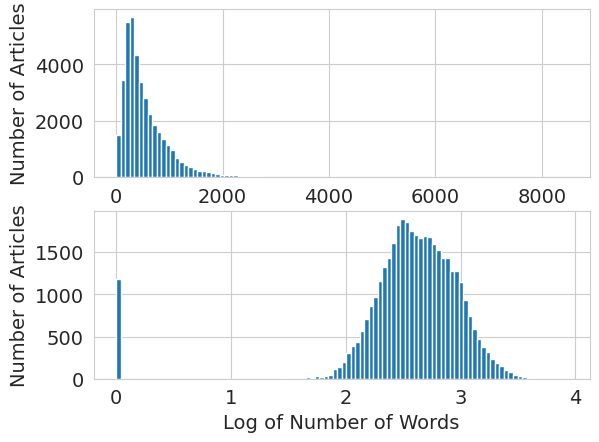

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1)
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Articles', fontsize=14)

df['log_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Number of Words', fontsize=14)
ax2.set_ylabel('Number of Articles', fontsize=14)

In [48]:
biz_file.columns.tolist()

['business_id',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'stars',
 'review_count',
 'is_open',
 'attributes',
 'categories',
 'hours',
 'log_review_count']

In [49]:
biz_file[['review_count', 'log_review_count', 'stars']]

,review_count,log_review_count,stars
0,7,0.845098,5.0
1,15,1.176091,3.0
2,22,1.342423,3.5
3,80,1.903090,4.0
4,13,1.113943,4.5
...,...,...,...
150341,13,1.113943,3.0
150342,5,0.698970,4.0
150343,8,0.903090,3.5
150344,24,1.380211,4.0


In [50]:
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_file[['review_count']], biz_file['stars'], cv=10)

m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_file[['log_review_count']], biz_file['stars'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00354 (+/- 0.00148)
R-squared score with log transform: 0.00241 (+/- 0.00125)


In [51]:
mean_orig = scores_orig.mean()
std_orig = scores_orig.std() * 2

mean_log = scores_log.mean()
std_log = scores_log.std() * 2

print(f"""Model Comparison:
---------------
Original Feature -> R² = {mean_orig:.5f} (+/- {std_orig:.5f})
Log Feature -> R² = {mean_log:.5f} (+/- {std_log:.5f})
""")

Model Comparison:
---------------
Original Feature -> R² = 0.00354 (+/- 0.00148)
Log Feature -> R² = 0.00241 (+/- 0.00125)



In [53]:
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, df[['n_tokens_content']], df['shares'], cv=10)

m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, df[['log_n_tokens_content']], df['shares'], cv=10)

In [54]:
mean_orig = scores_orig.mean()
std_orig = scores_orig.std() * 2

mean_log = scores_log.mean()
std_log = scores_log.std() * 2

print(f"""
Model Comparison:
Original Feature -> R² = {mean_orig:.5f} (+/- {std_orig:.5f})
Log Feature -> R² = {mean_log:.5f} (+/- {std_log:.5f})
""")


Model Comparison:
Original Feature -> R² = -0.00242 (+/- 0.00509)
Log Feature -> R² = -0.00114 (+/- 0.00418)



Text(0, 0.5, 'Number of Shares')

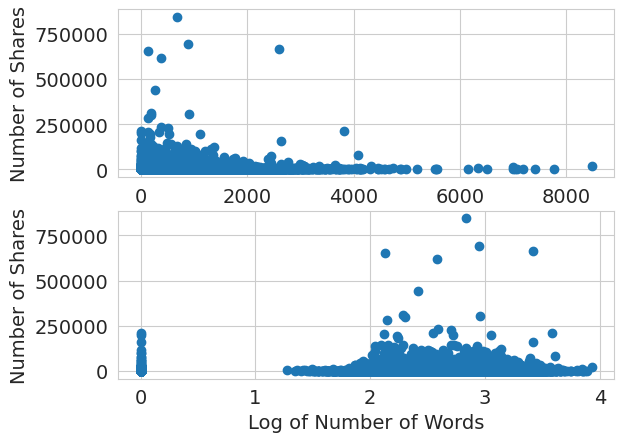

In [56]:
fig2, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(df['n_tokens_content'], df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2.scatter(df['log_n_tokens_content'], df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Number of Words', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

Text(0, 0.5, 'Average Star Rating')

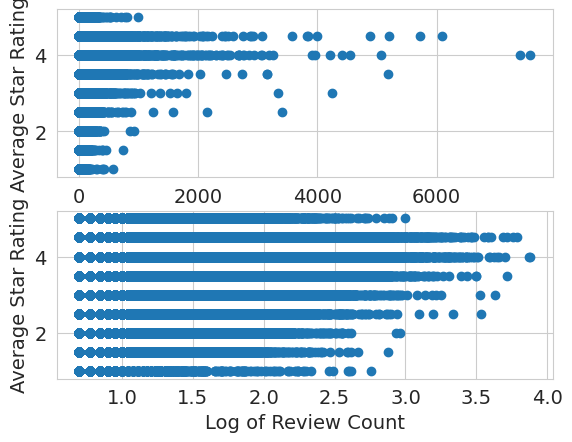

In [57]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(biz_file['review_count'], biz_file['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2.scatter(biz_file['log_review_count'], biz_file['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

In [59]:
biz_file[['review_count', 'stars']].corr()

,review_count,stars
review_count,1.000000,0.059876
stars,0.059876,1.000000


In [60]:
biz_file[['log_review_count', 'stars']].corr()

,log_review_count,stars
log_review_count,1.000000,0.049448
stars,0.049448,1.000000
